In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [2]:
a = 2
b = 10
c = 7
f = 4


In [3]:
e = a * b
d = e + c
L = f * d

In [4]:
L

108

In [5]:
def manual_gradient():

    a = 2
    b = 10
    c = 7
    f = 4


    h = 0.01
    
    e = a * b
    d = e + c
    L = f * d

    
    a += h

    e = a * b
    d = e + c
    L_ = f * d 

    dL_df = (L_ - L) / h     #partial derivative

    return dL_df
    
    

In [6]:
manual_gradient()

39.99999999999915

In [7]:
class Val():


    def __init__(self,data,children = () , op="",label = "" ):

        self.data = data
        self.op = op
        self.children = children
        self.label = label
        self.grad = 0



    def __repr__(self):
        return f"Value(data={self.data})"


    
    def __add__(self,other):
        out =  Val((self.data + other.data),(self,other), "+")
        

        return out


    def __mul__(self,other):
        out = Val((self.data*other.data),(self,other),"*")


        return out



    

        

        


    







    

In [8]:
a = Val(2) ; a.label = "a"
b = Val(10) ; b.label = "b"

c = Val(7) ; c.label = "c"
f = Val(4) ; f.label = "f"


In [9]:
e = a*b ; e.label = "e"
e.label

'e'

In [10]:
d = e + c ; d.label = "d"

In [11]:
L = f * d ; L.label = "L"

In [12]:
print(L.__dict__)

{'data': 108, 'op': '*', 'children': (Value(data=4), Value(data=27)), 'label': 'L', 'grad': 0}


In [13]:
print(L.children[1].__dict__)

{'data': 27, 'op': '+', 'children': (Value(data=20), Value(data=7)), 'label': 'd', 'grad': 0}


In [18]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.op, label = n.op)
      # and connect this node to it
      dot.edge(uid + n.op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.op)

  return dot

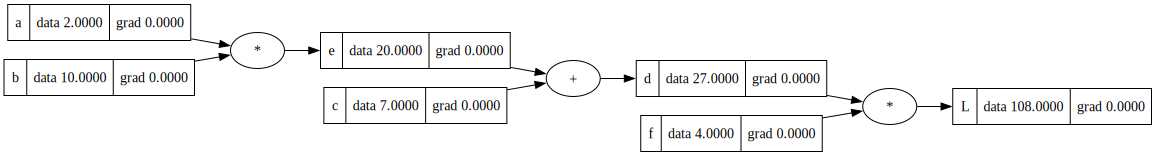

In [19]:
draw_dot(L)